# MinMaxScaler used
# only possible with 4 columns and 7000 rows. Afterwards adding more columns and the regressor 
# returned an error. Even if the number of rows were reduced to 200

# facades number has NaN's, before and after the scaling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#importing scalers
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#from sklearn_pandas import DataFrameMapper
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import PolynomialFeatures
#from sklearn.pipeline import make_pipeline

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score 


## making use of version 03 of the file

In [2]:
#df =pd.DataFrame(pd.read_csv('Data_for_Regression_vers03.csv',low_memory=False, header=0))

df = pd.read_csv('Data_for_Regression_vers03.csv', low_memory=False)
#df = pd.read_csv('Data_for_Regression_vers03csv', low_memory=False, header=0)

In [3]:
df.head()

,source,postcode,house_is,price,rooms_number,area,equipped_kitchen_has,furnished,open_fire,terrace,...,LOFT,MANOR_HOUSE,MANSION,MIXED_USE_BUILDING,OTHER_PROPERTY,PENTHOUSE,SERVICE_FLAT,TOWN_HOUSE,TRIPLEX,VILLA
0,6,4180,1,295000.0,3.0,242.0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,6,8730,1,675000.0,4.0,349.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,6,4020,1,250000.0,5.0,303.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,1200,1,545000.0,4.0,235.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,1190,1,500000.0,2.0,220.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [4]:
df.shape

(11288, 41)

In [5]:
df.columns

Index(['source', 'postcode', 'house_is', 'price', 'rooms_number', 'area',
       'equipped_kitchen_has', 'furnished', 'open_fire', 'terrace',
       'terrace_area', 'garden', 'garden_area', 'land_surface',
       'facades_number', 'swimming_pool_has', 'region', 'building_state_agg',
       'APARTMENT', 'APARTMENT_BLOCK', 'BUNGALOW', 'CASTLE', 'CHALET',
       'COUNTRY_COTTAGE', 'DUPLEX', 'EXCEPTIONAL_PROPERTY', 'FARMHOUSE',
       'FLAT_STUDIO', 'GROUND_FLOOR', 'HOUSE', 'KOT', 'LOFT', 'MANOR_HOUSE',
       'MANSION', 'MIXED_USE_BUILDING', 'OTHER_PROPERTY', 'PENTHOUSE',
       'SERVICE_FLAT', 'TOWN_HOUSE', 'TRIPLEX', 'VILLA'],
      dtype='object')

In [6]:
print(df["building_state_agg"])



0               good
1               good
2        to_renovate
3          renovated
4               good
            ...     
11283           good
11284           good
11285           good
11286    to_renovate
11287           good
Name: building_state_agg, Length: 11288, dtype: object


In [7]:
print(df['region']) # bij read_csv met header=0, dan kan deze print niet gebeuren, geeft fout

0        W
1        F
2        W
3        B
4        B
        ..
11283    F
11284    F
11285    F
11286    F
11287    F
Name: region, Length: 11288, dtype: object


In [8]:
#Before the scaling same result as after scaling
#print(df['facades_number'])

## drop non-string columns and irrelevant columns like source

In [9]:
df = df.drop(['source', 'building_state_agg', 'region', 'facades_number'], axis=1)

# select train and test data

In [10]:
#np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

## Instantiate and Apply MinMaxScaler

<span style="color:blue"> **apply scaler to all columns apart from dummies and yes/no columns (scaler = MinMaxScaler() )** </span>


In [11]:
scaler = MinMaxScaler()

num_vars_scaler = ['area', 'postcode', 'rooms_number', 'garden_area', 'land_surface', 'terrace_area', 'price']

df_train[num_vars_scaler] = scaler.fit_transform(df_train[num_vars_scaler])

## check correlation

#### reduce number of columns

In [12]:
columns_correlation = df[['area', 'postcode', 'rooms_number', 'garden_area', 'terrace_area', 'land_surface','price']]

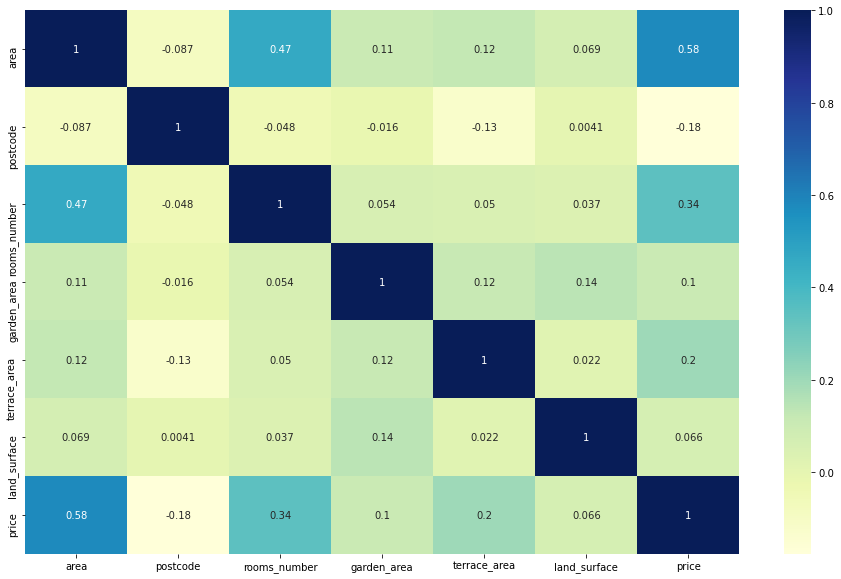

In [13]:


# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(columns_correlation.corr(), annot = True, cmap="YlGnBu")
plt.show()



## Dividing into X and Y sets for the model building

In [14]:
#y_train = df_train.pop('price')
#X_train = df_train

In [15]:
#X_train = df_train[['area', 'postcode', 'rooms_number', 'garden_area', 'land_surface', 'terrace_area', 'facades_number']]
X_train = pd.DataFrame(df_train[['area', 'postcode', 'garden', 'rooms_number', 'terrace_area']])
y_train = pd.DataFrame(df_train['price'])

In [16]:
# "reduce number of lines"
#X_train = X_train.iloc[0 : 200]
#y_train = y_train.iloc[0 : 200]

In [17]:
#reshape the data
#X_train.values.reshape(-1, 1)
#y_train.values.reshape(-1, 1)


In [18]:
print(y_train.head())

          price
2306   0.041711
5010   0.012672
10753  0.024266
1721   0.034847
10354  0.018374


In [19]:
print(y_train.shape)

(7901, 1)


In [20]:
print(X_train.head())

           area  postcode  garden  rooms_number  terrace_area
2306   0.020711  0.036699       1      0.019608      0.080808
5010   0.022925  0.700623       0      0.014706      0.016162
10753  0.013597  0.866326       1      0.009804      0.040404
1721   0.031937  0.023354       0      0.029412      0.000000
10354  0.012964  0.211299       0      0.009804      0.000000


In [21]:
print(X_train.shape)

(7901, 5)


# <span style="color:blue"> **Building model** </span>

## Fitting regressor to the data

In [22]:


lm = LinearRegression(fit_intercept=True)
#lm = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
lm.fit(X_train, y_train)



LinearRegression()

## Running RFE with the output number of the variable equal to 10

In [23]:
rfe = RFE(lm, 6)             # running RFE
rfe = rfe.fit(X_train, y_train)

## Combining support_ and ranking_ data

In [24]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('postcode', True, 1),
 ('garden', True, 1),
 ('rooms_number', True, 1),
 ('terrace_area', True, 1)]

In [25]:
col = X_train.columns[rfe.support_]
col

Index(['area', 'postcode', 'garden', 'rooms_number', 'terrace_area'], dtype='object')

In [26]:
X_train.columns[~rfe.support_]

Index([], dtype='object')

## Building statsmodel, for the detailed statistics

In [27]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [28]:


# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)



In [29]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [30]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     964.2
Date:                Fri, 20 Nov 2020   Prob (F-statistic):               0.00
Time:                        13:22:44   Log-Likelihood:                 12955.
No. Observations:                7901   AIC:                        -2.590e+04
Df Residuals:                    7895   BIC:                        -2.586e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0196      0.001     17.848   

In [31]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [32]:


vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif



,Features,VIF
0,const,4.32
1,area,1.24
4,rooms_number,1.21
5,terrace_area,1.07
3,garden,1.05
2,postcode,1.03


## plotting histogram of errors and see how the normal distribution is about

In [33]:
y_train_price = lm.predict(X_train_rfe)

In [34]:
res = (y_train_price - y_train)

Text(0.5, 0, 'Errors')

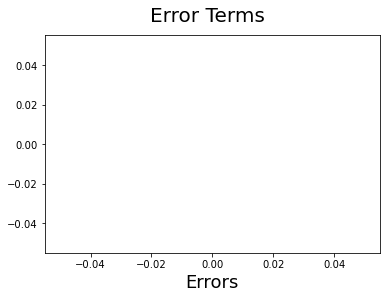

In [35]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [36]:


#plt.scatter(y_train,res)
#plt.show()



## Evaluation of the model

In [37]:
num_vars_scale_eval = ['area', 'postcode', 'rooms_number', 'garden_area', 'terrace_area', 'land_surface','price']

In [38]:


df_test[num_vars_scale_eval] = scaler.fit_transform(df_test[num_vars_scale_eval])



## Making X-test and y_test

In [39]:
y_test = df_test.pop('price')
X_test = df_test


In [40]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [41]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_rfe = X_test[X_train_rfe.columns]

In [42]:
# Making predictions
y_pred = lm.predict(X_test_rfe)


In [43]:
# R2 score in order to test the model

r2_score(y_test, y_pred)

0.24716866472507026

Text(0, 0.5, 'y_pred')

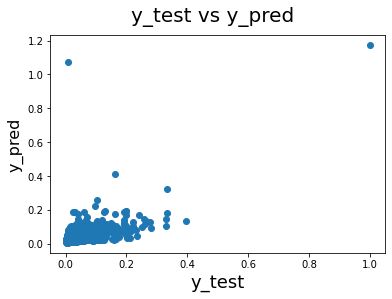

In [44]:


# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

